In [1]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

In [2]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)

In [14]:
args['problem'] = 'example_test.smt2'

args['n_tries'] = 10
args['eps'] = 3e-4

lines = open(args['problem'], 'r').readlines()
args['lines'] = lines
lines

['  (param (A B C) polygon)\n',
 '    (assert (= (dist A B) 6))\n',
 '  (assert (= (dist B C) 8))\n',
 '  (define D point (midp A C))\n',
 '  (define E point (foot B (line A C)))\n',
 '  (eval (= (dist D E) (div 15 5)))']

In [15]:
# lines = [
#     '(param (A B C D) polygon)',
#     '(param C1 circle)',
#     '(define L1 line (reflect-ll (line C D) (line A B)))',
#     '(param F point (in-poly A B C D))',
#     '(param G point (on-line L1))',
#     '(define H point (inter-lc L1 C1 (rs-closer-to-p A)))',

#     # '(param A point)',
#     # '(param B point)',
#     # '(param C point)',
#     # #'(param C1 circle)',
#     # '(define D point (excenter A B C))',
#     # '(define C2 circle (excircle A B C))',
#     # '(define C1 circle (circumcircle A B C))',
#     # #'(define L1 line (connecting A B))\n',
#     # #'(eval (coll A B C))'

#     # '(param A point)',
#     # '(param B point)',
#     # '(define L1 line (line A B))',

# ]
# args['lines'] = lines

In [16]:
#args['dir'] = '../test_new_functions'

Processing instructions...:   0%|          | 0/6 [00:00<?, ?it/s]

INPUT INSTRUCTIONS:
sample (A B C) polygon ()
assert (eq-n (dist A B) 6.0)
assert (eq-n (dist B C) 8.0)
define D ((midp A C))
define E ((foot B (connecting A C)))
eval (eq-n (dist D E) (div 15.0 5.0))


Sampling initializations...: 100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


[     0]  14.744669429601 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0086335594
  polygon-first-eq-last                              0.0563274747
  polygon-first-angle-eq-sampled                     0.0224560233
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                10.6572454941
  points                                             0.0000062660
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     5.2055547377
-- NDGs --


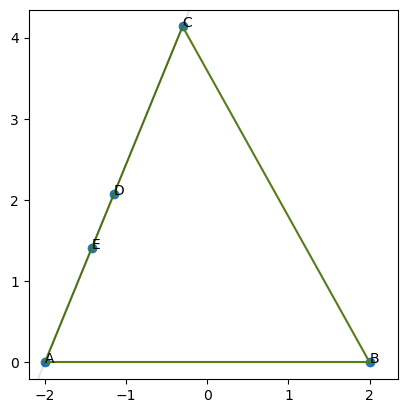

[   100]   8.648158841702 ||   0.096496
[   200]   8.272967996257 ||   0.093115
[   300]   8.159292988326 ||   0.089852
[   400]   8.108449022571 ||   0.086704
[   500]   8.079224900892 ||   0.083666
[   600]   8.061502411354 ||   0.080734
[   700]   8.049551289197 ||   0.077906
[   800]   8.041664105987 ||   0.075176
[   900]   8.035048293839 ||   0.072542
[  1000]   8.030109523639 ||   0.070000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000279915
  polygon-first-eq-last                              0.0000616758
  polygon-first-angle-eq-sampled                     0.0000200712
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0299918004
  points                                             0.0000073728
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.1181308464
-- NDGs --


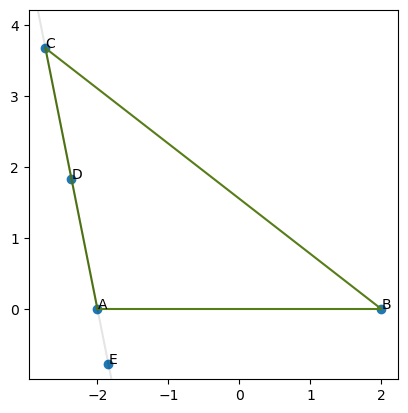

[  1100]   8.026316080339 ||   0.067547
[  1200]   8.023392928720 ||   0.065180
[  1300]   8.023179666921 ||   0.062897
[  1400]   8.018680468636 ||   0.060693
[  1500]   8.017010010224 ||   0.058566
[  1600]   8.015586730058 ||   0.056514
[  1700]   8.014218268453 ||   0.054534
[  1800]   8.013873412750 ||   0.052623
[  1900]   8.012193010199 ||   0.050779
[  2000]   8.011366414517 ||   0.049000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000014444
  polygon-first-eq-last                              0.0000391966
  polygon-first-angle-eq-sampled                     0.0000494769
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0112683528
  points                                             0.0000073318
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.0666526544
-- NDGs --


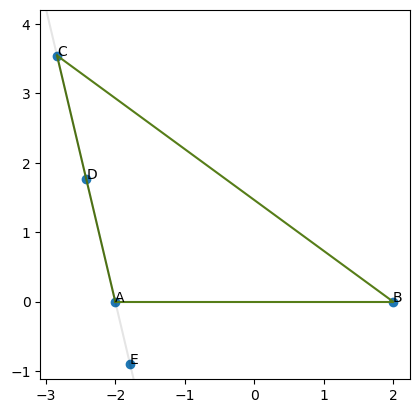

[  2100]   8.010590008364 ||   0.047283
[  2200]   8.009961270426 ||   0.045626
[  2300]   8.012970350248 ||   0.044028
[  2400]   8.008729050014 ||   0.042485
[  2500]   8.008269736133 ||   0.040996
[  2600]   8.008061823875 ||   0.039560
[  2700]   8.007432384320 ||   0.038174
[  2800]   8.007640625417 ||   0.036836
[  2900]   8.007055517496 ||   0.035545
[  3000]   8.006361704865 ||   0.034300
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000001668
  polygon-first-eq-last                              0.0000200693
  polygon-first-angle-eq-sampled                     0.0000125620
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0063209938
  points                                             0.0000073009
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.0393238140
-- NDGs --


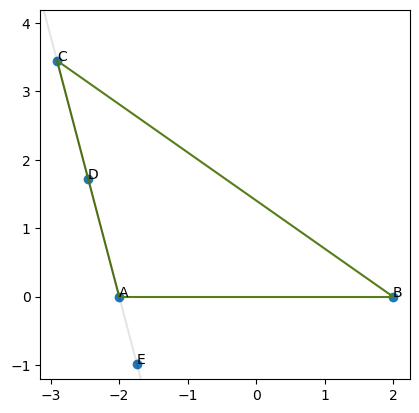

[  3100]   8.006245465986 ||   0.033098
[  3200]   8.005827349289 ||   0.031938
[  3300]   8.006207848623 ||   0.030819
[  3400]   8.005484274366 ||   0.029739
[  3500]   8.005081207313 ||   0.028697
[  3600]   8.005601143763 ||   0.027692
[  3700]   8.005208240107 ||   0.026722
[  3800]   8.004519545142 ||   0.025785
[  3900]   8.004967707043 ||   0.024882
[  4000]   8.004253289226 ||   0.024010
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000754
  polygon-first-eq-last                              0.0000862228
  polygon-first-angle-eq-sampled                     0.0000013475
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0041577381
  points                                             0.0000072933
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.0331089493
-- NDGs --


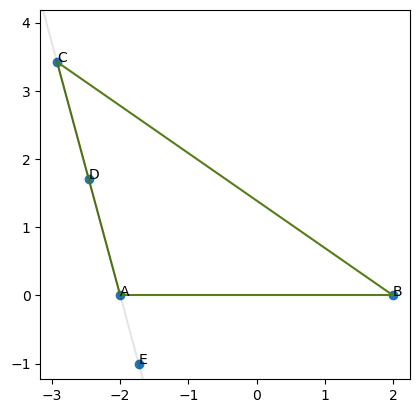

[  4100]   8.004030997571 ||   0.023169
[  4200]   8.004183414338 ||   0.022357
[  4300]   8.003865857986 ||   0.021574
[  4400]   8.003639678060 ||   0.020818
[  4500]   8.004705884546 ||   0.020088
[  4600]   8.003474188625 ||   0.019384
[  4700]   8.003702720909 ||   0.018705
[  4800]   8.003254280351 ||   0.018050
[  4900]   8.003297986026 ||   0.017417
[     0]  16.073943167380 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0119211027
  polygon-first-eq-last                              0.0047881026
  polygon-first-angle-eq-sampled                     0.0070437738
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                12.0501842500
  points                                             0.0000053262
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     5.0449949182
-- NDGs --


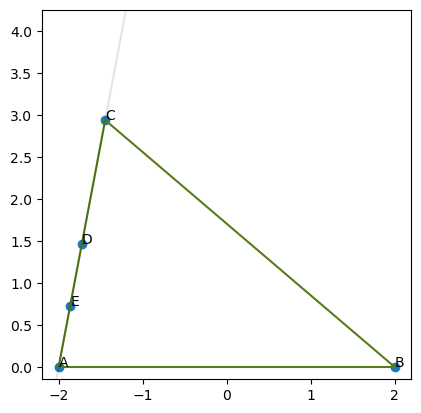

[   100]   8.784447789919 ||   0.096496
[   200]   8.326536519035 ||   0.093115
[   300]   8.190352971120 ||   0.089852
[   400]   8.128580555886 ||   0.086704
[   500]   8.094895100780 ||   0.083666
[   600]   8.073592580460 ||   0.080734
[   700]   8.059330601785 ||   0.077906
[   800]   8.049063107602 ||   0.075176
[   900]   8.041502371016 ||   0.072542
[  1000]   8.035797530625 ||   0.070000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000011502
  polygon-first-eq-last                              0.0000072595
  polygon-first-angle-eq-sampled                     0.0000256182
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0357553910
  points                                             0.0000074893
  distinct                                           0.0000000104
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.2680387655
-- NDGs --


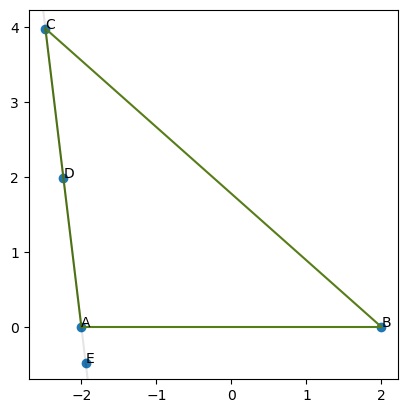

[  1100]   8.031378281053 ||   0.067547
[  1200]   8.027806402740 ||   0.065180
[  1300]   8.025120769167 ||   0.062897
[  1400]   8.022421976653 ||   0.060693
[  1500]   8.020236660529 ||   0.058566
[  1600]   8.018589256401 ||   0.056514
[  1700]   8.017069126631 ||   0.054534
[  1800]   8.015638329315 ||   0.052623
[  1900]   8.014479225040 ||   0.050779
[  2000]   8.013502178994 ||   0.049000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000009745
  polygon-first-eq-last                              0.0000592820
  polygon-first-angle-eq-sampled                     0.0000056684
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0134281533
  points                                             0.0000074860
  distinct                                           0.0000000028
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.2457527637
-- NDGs --


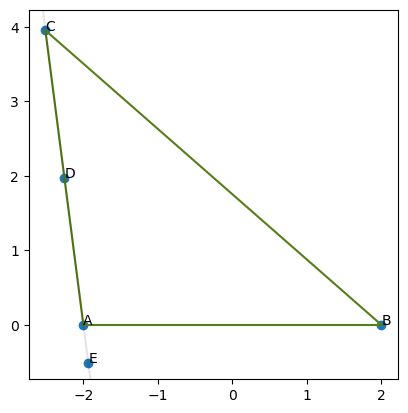

[  2100]   8.012565848501 ||   0.047283
[  2200]   8.011895145464 ||   0.045626
[  2300]   8.011227259291 ||   0.044028
[  2400]   8.010401293886 ||   0.042485
[  2500]   8.009817652230 ||   0.040996
[  2600]   8.010149448513 ||   0.039560
[  2700]   8.009178671101 ||   0.038174
[  2800]   8.008524653546 ||   0.036836
[  2900]   8.007963840050 ||   0.035545
[  3000]   8.007545514847 ||   0.034300
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000006398
  polygon-first-eq-last                              0.0000045157
  polygon-first-angle-eq-sampled                     0.0000006325
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0075316670
  points                                             0.0000074479
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.1917411125
-- NDGs --


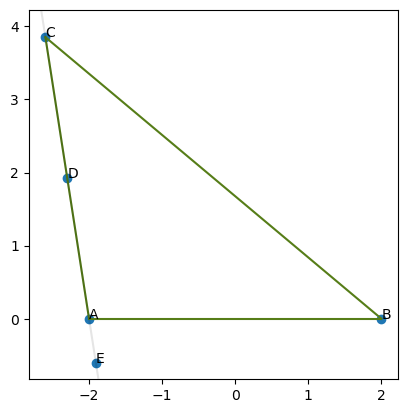

[  3100]   8.007207085547 ||   0.033098
[  3200]   8.006921205146 ||   0.031938
[  3300]   8.006600702789 ||   0.030819
[  3400]   8.006323033906 ||   0.029739
[  3500]   8.006040806037 ||   0.028697
[  3600]   8.005866351133 ||   0.027692
[  3700]   8.010181011508 ||   0.026722
[  3800]   8.005365429237 ||   0.025785
[  3900]   8.005216467772 ||   0.024882
[  4000]   8.004979279921 ||   0.024010
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000070
  polygon-first-eq-last                              0.0000169466
  polygon-first-angle-eq-sampled                     0.0000004195
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0049538564
  points                                             0.0000074384
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.1781152330
-- NDGs --


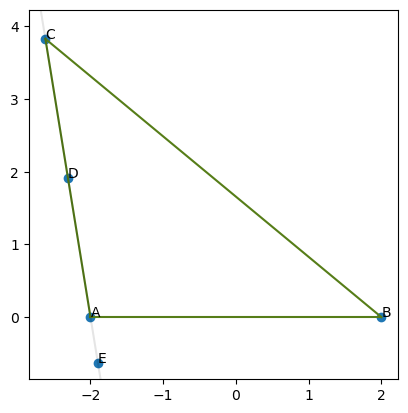

[  4100]   8.004790810098 ||   0.023169
[  4200]   8.004623260082 ||   0.022357
[  4300]   8.004459938867 ||   0.021574
[  4400]   8.004396200308 ||   0.020818
[  4500]   8.004424259362 ||   0.020088
[  4600]   8.004205528749 ||   0.019384
[  4700]   8.004021092882 ||   0.018705
[  4800]   8.003968139681 ||   0.018050
[  4900]   8.004005443116 ||   0.017417
[     0]  16.152180607892 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0058000429
  polygon-first-eq-last                              0.0074548022
  polygon-first-angle-eq-sampled                     0.0235752313
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                12.1153444030
  points                                             0.0000055164
  distinct                                           0.0000000000
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     5.5574692921
-- NDGs --


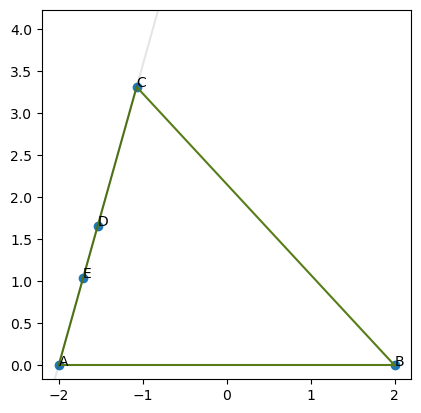

[   100]   8.789355482552 ||   0.096496
[   200]   8.328644703779 ||   0.093115
[   300]   8.191739119492 ||   0.089852
[   400]   8.129701374853 ||   0.086704
[   500]   8.095051425610 ||   0.083666
[   600]   8.073827802894 ||   0.080734
[   700]   8.059471730293 ||   0.077906
[   800]   8.049306512139 ||   0.075176
[   900]   8.041775316850 ||   0.072542
[  1000]   8.036077694953 ||   0.070000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000053890
  polygon-first-eq-last                              0.0000806719
  polygon-first-angle-eq-sampled                     0.0000062728
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0359769173
  points                                             0.0000075309
  distinct                                           0.0000003011
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.3264380915
-- NDGs --


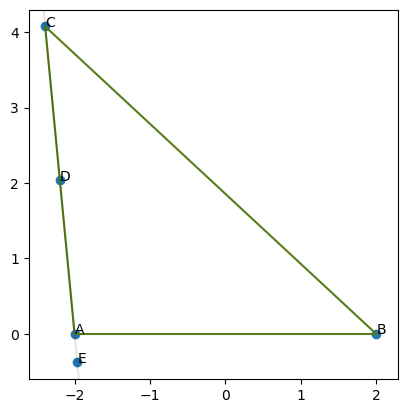

[  1100]   8.031701795624 ||   0.067547
[  1200]   8.028210618517 ||   0.065180
[  1300]   8.025278181339 ||   0.062897
[  1400]   8.022896654102 ||   0.060693
[  1500]   8.020518704961 ||   0.058566
[  1600]   8.018734728747 ||   0.056514
[  1700]   8.017348629824 ||   0.054534
[  1800]   8.015742915497 ||   0.052623
[  1900]   8.014555277032 ||   0.050779
[  2000]   8.013530775131 ||   0.049000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000000061
  polygon-first-eq-last                              0.0000087424
  polygon-first-angle-eq-sampled                     0.0000026581
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0135110221
  points                                             0.0000075356
  distinct                                           0.0000001988
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.3139696253
-- NDGs --


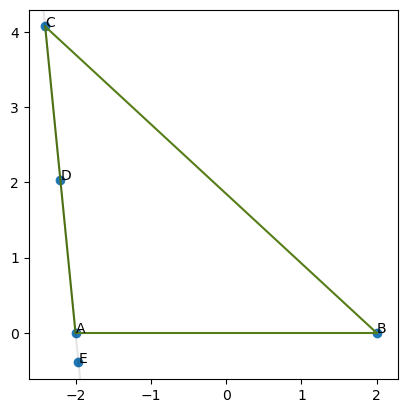

[  2100]   8.012796135189 ||   0.047283
[  2200]   8.011843047259 ||   0.045626
[  2300]   8.011957774533 ||   0.044028
[  2400]   8.010444943084 ||   0.042485
[  2500]   8.009994212718 ||   0.040996
[  2600]   8.010281217274 ||   0.039560
[  2700]   8.008918835705 ||   0.038174
[  2800]   8.008549225461 ||   0.036836
[  2900]   8.008562903782 ||   0.035545
[  3000]   8.007626081293 ||   0.034300
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000015033
  polygon-first-eq-last                              0.0000374085
  polygon-first-angle-eq-sampled                     0.0000009743
  eq-n_(dist A B)_6.0                                4.0000006121
  eq-n_(dist B C)_8.0                                4.0075780764
  points                                             0.0000074991
  distinct                                           0.0000000077
-- Goals --
  eq-n_(dist D E)_(div 15.0 5.0)                     0.2586977510
-- NDGs --


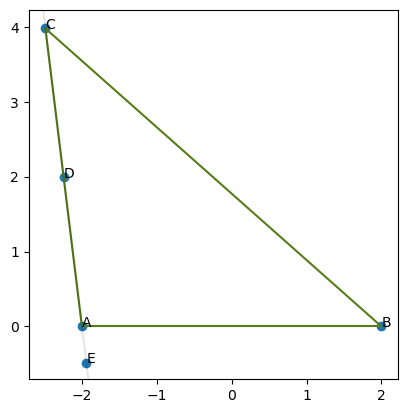

KeyboardInterrupt: 

In [17]:
res = build(args)

In [ ]:
for item in res[0]:
    print(item)

print('\n##############################################')

for item in res[1][0]:
    print(item)

;; 竞赛几何题：垂心对称点在外接圆上的性质

(param (A B C) acute-tri) ; 定义锐角三角形ABC

(define H point (orthocenter A B C)) ; H为垂心

(define M point (midp B C)) ; M为BC中点

(param D point) ; 定义自由点D

(assert (= (midp H D) M)) ; 约束D为H关于M的对称点

(define Gamma circle (circumcircle A B C)) ; 定义外接圆Gamma

(eval (on-circ D Gamma)) ; 验证D在外接圆上

##############################################
{<primitives.Point object at 0x000001D292B90550>: TfPoint(x=-0.4203581436731315, y=2.838658589240161), <primitives.Point object at 0x000001D292B908B0>: TfPoint(x=-2.0, y=0.0), <primitives.Point object at 0x000001D292B90820>: TfPoint(x=2.0, y=0.0), <primitives.Point object at 0x000001D292B90EE0>: TfPoint(x=-0.4203581436731317, y=1.3468682163962105), <primitives.Point object at 0x000001D292B903D0>: TfPoint(x=0.0, y=0.0), <primitives.Point object at 0x000001D2883D18E0>: TfPoint(x=0.4171581259706714, y=-1.3457968271026655)}
{}
{<primitives.Circle object at 0x000001D2883D1DF0>: CircleNF(center=TfPoint(x=2.2044684514802256e-16, y=0.7458951864

In [ ]:
for obj_name, obj in res[1][0].named_points.items():
    print(obj_name)
    print(obj)
    (x, y) = obj

for obj_name, obj in res[1][0].named_lines.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
    # slope = y/x, intercept = r

for obj_name, obj in res[1][0].named_circles.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj

A
(coords -0.420358 2.838659)
B
(coords -2.000000 0.000000)
C
(coords 2.000000 0.000000)
H
(coords -0.420358 1.346868)
M
(coords 0.000000 0.000000)
D
(coords 0.417158 -1.345797)
Gamma
CircleNF(center=TfPoint(x=2.2044684514802256e-16, y=0.745895186421975), radius=2.134563100291831)
